In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft

## Parámetros de la señal analógica y el muestreo

*F1*: frecuencia del primer senoidal = 1 Hz

*F2*: frecuencia del segundo senoidal = 2 Hz


Escogemos la frecuencia de muestreo como el doble de la componente de mayor frecuencia

$ F_S = F2 * 2 $

Y por lo tanto, el período de muestreo es el inverso de esta frecuencia:

$ T_S = 1 / F_S $

Debemos calcular la distancia entre muestras en el dominio de la frecuencia:

$ d_f = 1 / T_S $

Escogemos un número de muestras significativo, para que sea una potencia de 2 y sea un número suficiente

`N = 2**8`

equivale a 

$ N = 2^8 = 256 $


El tiempo total que muestrearemos la señal depende del número de muestras (N) y del tiempo de muestreo:


$ T_{total} = Ts * N $ 


Generamos en el vector de tiempo para las muestras:

`ts = np.arange(0, T_total, Ts)`

Esto genera muestras espaciadas por $ T_S $ segundos, desde 0 hasta $ T_{total} $


Finalmente, generamos la señal muestreada y la graficamos:


```
ss = np.cos(2*np.pi*F1*ts) + np.cos(2*np.pi*F2*ts)
plt.stem(ts, ss)
```


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<StemContainer object of 3 artists>

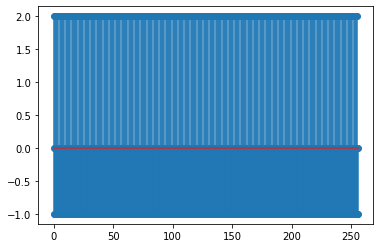

In [4]:
F1 = 1
F2 = 2


Fs = F2*2
Ts = 1/Fs

df = 1/Ts


N = 2**10

T_total = Ts * N
ts = np.arange(0, T_total, Ts)

ss = np.cos(2*np.pi*F1*ts) + np.cos(2*np.pi*F2*ts)
plt.stem(ts, ss)

## Cálculo del espectro

Para calcular el espectro, vamos a usar algunas funciones de la librería scipy (Scientific Python).
Recuerde importar al inicio la librería:
```
import scipy.fft as fft 
```

En las líneas siguientes se muestra:

`S = fft.fft(ss) / len(ss)`

Esto permite aplicar la transformada rápida de Fourier (FFT) sobre la señal ss. Luego de ello, dividimos entre el tamaño de este vector para ajustar la amplitud. 

`S = fft.fftshift(S)`

Esta función nos permite que el espectro aparezca con sus componentes de frecuencia en las posiciones correctas.


`S_mag = np.abs(S)`

Nos interesa graficar solamente la magnitud de la señal, ya que usualmente la transformada es un vector de números complejos.

`f = np.linspace(-df/2, df/2, N)`

Esto nos permite generar un vector en el dominio de la frecuencia, que va desde -df/2, hasta df/2, compuesto por N muestras.

Finalmente, graficamos con  `plt.plot(f, S_mag)`

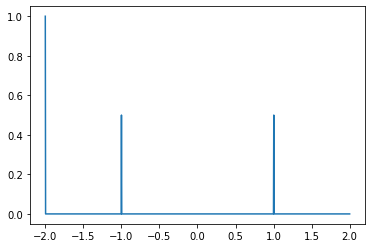

In [ ]:
S = fft.fft(ss) / len(ss)
S = fft.fftshift(S)
S_mag = np.abs(S)
f = np.linspace(-df/2, df/2, N)
plt.plot(f, S_mag)



Observe que este espectro está correcto (las componentes de frecuencia están en 1 y 2 Hz), pero aparece de forma incorrecta en 2 Hz. Esto ocurre porque la frecuencia de muestreo (Fs) coincide exactamente con la mayor frecuencia. Utilizaremos una frecuencia de muestreo un poco más alta para ver la forma que toma este espectro.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


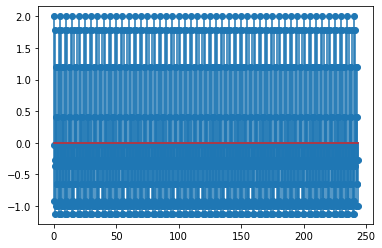

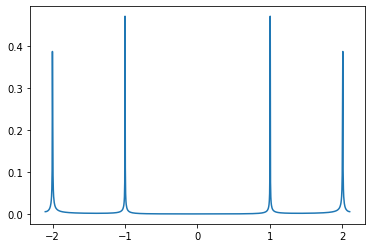

In [ ]:
F1 = 1
F2 = 2


Fs = F2*2.1
Ts = 1/Fs

df = 1/Ts


N = 2**10

T_total = Ts * N
ts = np.arange(0, T_total, Ts)

ss = np.cos(2*np.pi*F1*ts) + np.cos(2*np.pi*F2*ts)
plt.stem(ts, ss)

S = fft.fft(ss) / len(ss)
S = fft.fftshift(S)
S_mag = np.abs(S)
f = np.linspace(-df/2, df/2, N)

plt.figure()
plt.plot(f, S_mag)
